<center><font size="6"><b>ChBE 6745 Project: Improved Model report</b></font></center>

<center><font size="5"><b>Prediction of Adsorption Properties of Metal-Organic Frameworks with Framework Flexibility</b></font></center>

<center><b>Chao-Wen Chang, Pengfei Cheng, Po-Wei Huang, Xiaohan Yu, Yamin Zhang</b></center>

Based on our project plan and the feedback on our baseline models, we focus mainly on the following points in the improved model report:
- We address the **issue of the initial validation stratgy** and **present the new validation strategy**, in Section 2.3 and Section 4.
- We **analyze the overfitting issue of the pure rbf model**, and **re-implement it using the new validation strategy** in Section 5.
- We **implement three new models** on the dataset: **KRR, LASSO, MLPRegressor (neural network)** in Section 6-8.
- We add more descriptions on our project goals (Section 1.1), dataset, model training strategy and model validation strategy (Section 2.1-2.3).

# Introduction

## Project description

Agrawal and Sholl (2019) show that appropriate consideration of framework flexibility may be important to quantitative predictions about molecular adsorption in metal-organic frameworks (MOFs). 
Involving framework flexibility in molecular simulation may significantly affect adsorption uptakes and selectivities.
However, taking the framework flexibility into account directly in the molecular simulation framework may be 5-10 times more computationally expensive than standard simulation methods based on rigid crystal structure. Therefore, we are interested in constructing a regression model to predict the adsorption properties of MOFs with framework flexibility involved.


## Goals

We plan to construct different regression models and evaluate their performance on **predicting single-component adsorption uptake of MOFs with framework flexibility with respect to certain adosrbates at saturation pressure**, based on three types of input: 
1. the features of the MOFs, 
2. the features of adsorbates, and 
3. the single-component adsorption uptake of MOFs with framework flexibility with respect to certain adosrbates *from standard simulation methods based on rigid crystal structure*.

The main focus of this project is to:
1. implement various regression algorithms on the proposed dataset to find the one with the best prediction ability,
2. apply hyperparameter tuning for each algorithm to improve model performance, and
3. combine different validation strategies and apply throughout the project to make the models robust and least biased.

The features of the MOF have been pre-selected and the number of the overvall features is relatively small, so we do not address feature engineering as the main focus of our project, though it may be related to some regression models, such as LASSO.

# Methodology

## Dataset details

The dataset discussed below is provided by Dr. David Sholl's group.
The corresponding files can be found at the `data` folder.

The dataset is composed of three parts:
1. **29 MOF features** (under `data/ML_data`),
2. **6 adsorbate features** (manually added below), and
3. **adsorption uptakes** of **801 (MOF, adsorbate) pairs** (under `data/flexibility_data/y_data/adsorption_data`), containing two values:
    1. values from rigid model (serve as a feature)
    2. mean values from flexible model (serve as $y$)

All features are continuous entries.
The dimension of the input is $(801, 29 + 6 + 1) = (801, 36)$.
The dimension of the output is $(801, 1)$.


## Model training strategy

We plan to train 5 models for the proposed problem:

1. Multi-linear regression
2. RBF kernel regression
3. Kernel ridge regression (KRR)
4. LASSO regression
5. MLPRegressor (neural network)

Multi-linear serves as a baseline model to assess the performance of other models.
RBF kernel regression (without regularization) also serves as a baseline model with nonlinearity.
These two models were built and tested in the baseline model report.

The rest three models are covered in the report.
The KRR model is built to show the power of regularization compared with the pure RBF kernel regression model.
The LASSO model is built for both multi-linear regression and RBF kernel regression.
It can be used to see the impact of complexity optimization on final performance comparison on the validation set.
Finally the MLPRegressor model is built as a representation of the neural network algorithms.
Implementing this model is an attempt on models that are not covered in the class and will be tested against other algorithms in the final report.



## Model validation strategy

Our *new* validation strategy is as follows:
1. We first apply hold-out to split 25% of the data as validation set, which would not be modified or changed throughout the training-testing process.
2. After hold-out, we then apply 5-fold on the rest 75% data to form five (training set, test set) pairs. 
Each training set contains 75%\*80%=60% data, and each test set contains 75%\*20%=15% data.
The same five pairs are used throughout the project for model training and hyperparameter tuning for all models. 
In this way the training and the tuning processes will be least biased by how the dataset is split into the training and test sets.

The 5-fold is implemented based on the following feature of `GridSearchCV`:
it can take [CV splitter](https://scikit-learn.org/stable/glossary.html#term-cv-splitter) object as its `cv` argument.
Therefore, if we can define a 5-fold CV splitter object beforehand and apply it during the training process for all the models, we can guarantee that the same (training set, test set) pairs are used and no bias is generated by the validation strategy.
For models that do not use `GridSearchCV`, an explicit for-loop iterating the five (training set, test set) pairs is used instead, which are generated from the same CV splitter object.


In the baseline model report, a relatively simple strategy is used: 
after hold-out to split 25% of the data as validation set, we applied another hold-out to split the rest data into a single (training set, test set) pair.
The latter can be seen as applying a 1-fold.
Compared with the current strategy, the previous validation strategy is significantly less robust, as it is highly possible to be affected by the sampling of training/test set, while the 5-fold can alleviate this issue.
Therefore, we can expect that the models trained with the new validation strategy will be more stable in terms of prediction quality.

The implementation the new validation strategy is shown in Section 4.

## Hyperparameter optimization strategy

A general hyperparameter optimization strategy is used for all models except for `MLPRegressor`, which is described below:
1. rough estimation: for each hyperparameter, a list of value range (typically roughly logarithmically discretized) is given to `GridSearchCV`.
`GridSearchCV` searchs through the lists for all hyperparameters and returns the best ones.
2. refined estimation: for each hyperparameter, a list of value range close to the best value determined in the first step is given to `GridSearchCV`.
`GridSearchCV` searchs through the lists for all hyperparameters and returns the best ones.

This strategy assumes that the loss function is convex over all hyperparameters jointly. 
This may be not reasonable but it will be well beyond the scope of this course to address this issue, so we apply this strategy for all models except `MLPRegressor`, whose tuning strategy is discussed separately in Section 7.1.


## Block diagram of data pipeline and model(s)

The block diagram is given below, where the highlighted part is covered in the improved model report.

<img src="images/block_diagram.png" width="600">

## Software packages

All algorithms are imported from `sklearn`.

- multi-linear regression: `sklearn.linear_model.LinearRegression`
- rbf kernel regressioni: `sklearn.metrics.pairwise.rbf_kernel`
- KRR: `sklearn.kernel_ridge.KernelRidge`
- LASSO: `sklearn.linear_model.Lasso`
- MLPregressor: `sklearn.neural_network.MLPRegressor`
- validation strategy: `sklearn.model_selection.train_test_split`, `sklearn.model_selection.KFold`
- hyperparameter tuning: `sklearn.model_selection.GridSearchCV`

# Data preprocessing

This section is the same as the one in the baseline model report, so no extra explanation or comment is provided here.

In [1]:
# Preamble for package import and figure formatting

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.kernel_ridge import KernelRidge
from sklearn.neural_network import MLPRegressor
from sklearn.metrics.pairwise import rbf_kernel

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 75
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.serif'] = "cm"
# plt.rcParams['text.usetex'] = True
# plt.rcParams['text.latex.preamble']= r"\usepackage{subdepth}, \usepackage{type1cm}"

In [2]:
# read MOF feature data

# read the 36-descriptor data
df36Descriptor = pd.read_excel('data/ML_data/descriptor_used.xlsx',header=4,index_col=1)

# clean up the column
columns = [df36Descriptor.columns[1]] + df36Descriptor.columns[3: -11].tolist()

newColumns = {}
for ci in columns:
    if ' ' in ci:
        newColumns[ci] = ci.split(' ',1)[0]
    elif '(' in ci:
        newColumns[ci] = ci.split('(',1)[0]
    else:
        newColumns[ci] = ci

dfShortNames = df36Descriptor[columns].rename(columns=newColumns)

# reduce columns to only contain MOF features
shared_descriptor = [col for col in dfShortNames.columns if col in newColumns]
dfMLReduced = dfShortNames[shared_descriptor]

In [3]:
# Read adsorption update data

# the MOFs in "dfMLReduced" and adsorption data sets are different, so it is necessary to match the MOFs in two datasets
def datasetMatch(MOFName):
    dfML= dfMLReduced[dfMLReduced['MOF'].isin(MOFName)].drop_duplicates()
    matchedMOFIndex=np.isin(MOFName, dfML['MOF'].values)
    return matchedMOFIndex, dfML

# read flexibility data
flexibilityList=os.listdir('data/flexibility_data/y_data/adsorption_data') # obtain list of csv files for 9 adsorption uptakes
flexivilityData=[]
adsorbateNameList = []

for i, name in enumerate(flexibilityList):
    # read csv files for certain adsorption uptakes
    df = pd.read_csv('data/flexibility_data/y_data/adsorption_data/' + name)
    
    # obtain the rigid value
    rigidValue = np.array(df[df.columns[1]], dtype = float)
    
    # obtain the flexible mean value
    flexValue = np.mean(np.array(df[df.columns[2:]],dtype=float),axis=1)
    
    # obtain the adsorbate label
    label = np.array([name.split("_")[1] for x in range(0,len(flexValue))],dtype=str)
    adsorbateNameList.append(name.split("_")[1])
    
    # stack the rigid value, flexible mean value and the adsorbate label
    singleSet = np.column_stack([rigidValue,flexValue,label])

    if i == 0:
        # obtain the name list of MOFs
        MOFNameTemp = np.array(df[df.columns[0]], dtype = str)
        MOFName = [x.split("_")[0] for x in MOFNameTemp]
        
        # search the MOF name in "dfMLReduced", generating dfML
        matchedMOFIndex, dfML = datasetMatch(MOFName)
        
        # generating flexibilityData as "y"
        flexibilityData = singleSet[matchedMOFIndex,:].copy()
    else:
        # concatenate "y"
        flexibilityData = np.concatenate([flexibilityData.copy(),singleSet[matchedMOFIndex,:].copy()])

In [4]:
# manually add adsorbate descriptors

# Mw/gr.mol-1, Tc/K, Pc/bar, ω, Tb/K, Tf/K

adsorbateData=np.array([
    ['xenon',131.293,289.7,58.4,0.008,164.87,161.2], 
    ['butane',58.1,449.8,39.5,0.3,280.1,146.7], 
    ['propene',42.1,436.9,51.7,0.2,254.8,150.6], 
    ['ethane',30.1,381.8,50.3,0.2,184.0,126.2], 
    ['propane',44.1,416.5,44.6,0.2,230.1,136.5], 
    ['CO2',44.0,295.9,71.8,0.2,317.4,204.9], 
    ['ethene',28.054,282.5,51.2,0.089,169.3,228], 
    ['methane',16.04,190.4,46.0,0.011,111.5,91],
    ['krypton',83.798,209.4,55.0,0.005,119.6,115.6]])

adDf = pd.DataFrame(data=adsorbateData, columns=["adsorbate", "Mw/gr.mol-1", "Tc/K", "Pc/bar", "ω", "Tb/K", "Tf/K"])

# sort the dataframe based on adsorbateNameList
sorterIndex = dict(zip(adsorbateNameList,range(len(adsorbateNameList))))
adDf['an_Rank'] = adDf['adsorbate'].map(sorterIndex)
adDf.sort_values(['an_Rank'],ascending = [True], inplace = True)
adDf.drop('an_Rank', 1, inplace = True)
adDfFloat = adDf.iloc[:, 1:].astype(np.float)
adDfFloat["adsorbate"] = adDf["adsorbate"]

In [5]:
## Combine MOF and adsorbate feature data

# replicate dfML for 9 adsorbates
dfMLReplicate = pd.concat([dfML]*9)

# replicate adDf for 89 MOFs
adDfReplicate = pd.DataFrame(np.repeat(adDfFloat.values,89,axis=0))
adDfReplicate.columns = adDfFloat.columns

# concatenate two datasets
dfMLReplicate.reset_index(drop=True, inplace=True)
adDfReplicate.reset_index(drop=True, inplace=True)
XAllDescriptor = pd.concat([dfMLReplicate, adDfReplicate],axis=1)

In [43]:
# generate X and y
print(XAllDescriptor.columns)
print(XAllDescriptor.shape)
X = np.concatenate((XAllDescriptor.iloc[:, 1:-1], flexibilityData[:, 0].reshape(-1, 1)),axis=1).astype(np.float)
y = flexibilityData[:, 1].astype('float64') .reshape(-1,1)
print(X.shape)
# feature scaling
X_scaled = (X - X.mean(axis=0))/X.std(axis=0) 

Index(['MOF', 'vf', 'nAT-H', 'nNM', 'nM', 'nTB', 'nSB', 'nMB', 'nRB', 'nR6',
       'nTrM', 'nDB', 'nAcyclB', 'nR8', 'nAlkylC', 'nVinylC', 'nEnamineAN',
       'nOHEPh', 'nR5', 'nR4', 'MType', 'MaxMVal', 'n-O-', 'F01[H-C]',
       'F01[C-N]', 'F01[C-O]', 'F02[H-C]', 'F02[C-N]', 'F02[C-O]',
       'Mw/gr.mol-1', 'Tc/K', 'Pc/bar', 'ω', 'Tb/K', 'Tf/K', 'adsorbate'],
      dtype='object')
(801, 36)
(801, 35)


# Validatoin strategy
## Hold-out for validation set

In [7]:
np.random.seed(5)

# combine the unscaled and scaled X, so that they can be split together
X_combined = np.concatenate((X, X_scaled), axis=1)

# ---------------------------- don't touch the validation set ----------------------------
X_train_test_combined, X_validation_combined, y_train_test, y_validation = train_test_split(X_combined, \
                                                                                            y, test_size=0.25)
X_train_test, X_train_test_scaled = X_train_test_combined[:, :35], X_train_test_combined[:, 35:]
X_validation, X_validation_scaled = X_validation_combined[:, :35], X_validation_combined[:, 35:]
# ---------------------------- don't touch the validation set ----------------------------

## 5-Fold for model training

As discussed in Section 2.3, we utilize the feature of `GridSearchCV` applying the same CV-splitter object `kf` for all models for training and hyperparameter optimization, which is defined below.

In [8]:
# create a CV-splitter object that is used for all models
kf = KFold(n_splits=5, shuffle = True, random_state=20)

# for models that cannot use kf, an explicit (train, test) pairs are created
for i, (train_index, test_index) in enumerate(kf.split(X_train_test_combined)):
    
    # initialize sets
    if i == 0:
        X_train_combined_5fold = np.zeros(X_train_test_combined[train_index].shape + (5,))
        X_test_combined_5fold = np.zeros(X_train_test_combined[test_index].shape + (5,))
        y_train_5fold = np.zeros(y_train_test[train_index].shape + (5,))
        y_test_5fold = np.zeros(y_train_test[test_index].shape + (5,))
    
    X_train_combined_5fold[:, :, i], X_test_combined_5fold[:, :, i] = X_train_test_combined[train_index], X_train_test_combined[test_index]
    y_train_5fold[:, :, i], y_test_5fold[:, :, i] = y_train_test[train_index], y_train_test[test_index]

X_train_5fold, X_train_scaled_5fold = X_train_combined_5fold[:, :35], X_train_combined_5fold[:, 35:]
X_test_5fold, X_test_scaled_5fold = X_test_combined_5fold[:, :35], X_test_combined_5fold[:, 35:]

# Re-implementing RBF kernel regresion (without regularization)

As mentioned in Section 2.3, we used a single 1-fold validation strategy when training the RBF kernel regression model.
The model obtained r2 = 0.0167 with unscaled data and r2 = 0.3449 with scaled data, both of which are significantly worse than the ones obtained from the multi-linear model.
There may be two reasons for the poor performance:
1. The original 1-fold strategy led to extremely umbalanced sampling between the training and the testing set. This can be avoided by updating the validation strategy.
2. There are 36 features with 801 points, $801 < 36^2$, so the overfitting is unavoidable. So regularization is necessary for the model.

We address the first point by re-implementing the RBF kernel regression using our new validation strategy.
For the second point, we would like to compare the results from RBF kernel regression with results from KRR to show the power of regularization in the final report.

Since pure RBF kernel regression model cannot directly apply `GridSearchCV`, we manually apply hyperparameter tuning using for-loops. 
We basically follow the general hyperparameter tuning strategy described in Section 2.4. 
After the best $\gamma$ is obtained in the rough estimation for a certain fold, we directly apply refined estimation in that certain fold.
The pure RBF kernel model is trained on both the unscaled data and the scaled data.

## Regression using unscaled data

In [9]:
# 1st round hyperparameter tuning

sigmas = np.array([1E-4, 5E-4, 1E-3, 5E-3, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 15, 20, 25, 30, 40, 50, 60])
gammas = 1./(2*sigmas**2)
r2_matrix = np.zeros((gammas.size, 3))

rbf_r2_list = []
rbf_coef_list = []
rbf_gamma_list = []

for i in range(5):
    
    rbf_coef_temp_list = [] # temporarily store parameter values for each gamma
    
    for j, gamma in enumerate(gammas):
    
        X_train_kernel = rbf_kernel(X_train_5fold[:, :, i], X_train_5fold[:, :, i], gamma = gamma)
        X_test_kernel = rbf_kernel(X_test_5fold[:, :, i], X_train_5fold[:, :, i], gamma = gamma)
        model_rbf = LinearRegression()
        model_rbf.fit(X_train_kernel, y_train_5fold[:, :, i])

        r2_matrix[j, 0] = gamma
        r2_matrix[j, 1] = model_rbf.score(X_train_kernel, y_train_5fold[:, :, i])
        r2_matrix[j, -1] = model_rbf.score(X_test_kernel, y_test_5fold[:, :, i])
        
        rbf_coef_temp_list.append(model_rbf.coef_)

    # For each fold, record the optimal gamma and the corresponding parameter values and r2
    n = r2_matrix[:, -1].argmax()
    rbf_r2_list.append(r2_matrix[n, -1])
    rbf_gamma_list.append(r2_matrix[n, 0])
    rbf_coef_list.append(rbf_coef_temp_list[n])


best_i = np.array(rbf_r2_list).argmax()
rbf_r2_best1 = rbf_r2_list[best_i]
rbf_gamma_best = rbf_gamma_list[best_i]
rbf_coef_best = rbf_coef_list[best_i]


for i in range(5):
    if i != best_i:
        print("Fold {}:\tr2={:.3f},\toptimal gamma={:.0e}".format(i, rbf_r2_list[i], rbf_gamma_list[i]))
    else:
        print("Fold {}:\tr2={:.3f},\toptimal gamma={:.0e}\t\t<-best performance".format(i, rbf_r2_list[i], rbf_gamma_list[i]))

Fold 0:	r2=0.036,	optimal gamma=2e+00		<-best performance
Fold 1:	r2=0.027,	optimal gamma=5e+01
Fold 2:	r2=0.009,	optimal gamma=5e+01
Fold 3:	r2=0.008,	optimal gamma=5e+01
Fold 4:	r2=0.019,	optimal gamma=2e+00


In [10]:
refined_gammmas = np.append(np.logspace(np.log(rbf_gamma_best) - 1, np.log(rbf_gamma_best) + 1, 10), rbf_gamma_best)

r2_matrix = np.zeros((gammas.size, 3))
rbf_coef_temp_list = []

for j, gamma in enumerate(refined_gammmas):

    X_train_kernel = rbf_kernel(X_train_5fold[:, :, best_i], X_train_5fold[:, :, best_i], gamma = gamma)
    X_test_kernel = rbf_kernel(X_test_5fold[:, :, best_i], X_train_5fold[:, :, best_i], gamma = gamma)
    model_rbf = LinearRegression()
    model_rbf.fit(X_train_kernel, y_train_5fold[:, :, best_i])

    r2_matrix[j, 0] = gamma
    r2_matrix[j, 1] = model_rbf.score(X_train_kernel, y_train_5fold[:, :, best_i])
    r2_matrix[j, -1] = model_rbf.score(X_test_kernel, y_test_5fold[:, :, best_i])

    rbf_coef_temp_list.append(model_rbf.coef_)

n = r2_matrix[:, -1].argmax()
rbf_refined_r2 = r2_matrix[n, -1]
rbf_refined_gamma = r2_matrix[n, 0]
rbf_refined_coef = rbf_coef_temp_list[n]

print("Fold {}:\tr2={:.3f},\toptimal gamma={:.0e}".format(best_i, rbf_refined_r2, rbf_refined_gamma))

Fold 0:	r2=0.040,	optimal gamma=2e+00


## Regression using scaled data

In [11]:
sigmas = np.array([1E-4, 5E-4, 1E-3, 5E-3, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 15, 20, 25, 30, 40, 50, 60])
gammas = 1./(2*sigmas**2)
r2_matrix = np.zeros((gammas.size, 3))

rbf_r2_list_scaled = []
rbf_coef_list_scaled = []
rbf_gamma_list_scaled = []

for i in range(5):
    
    rbf_coef_temp_list = []
    
    for j, gamma in enumerate(gammas):
    
        X_train_scaled_kernel = rbf_kernel(X_train_scaled_5fold[:, :, i], X_train_scaled_5fold[:, :, i], gamma = gamma)
        X_test_scaled_kernel = rbf_kernel(X_test_scaled_5fold[:, :, i], X_train_scaled_5fold[:, :, i], gamma = gamma)
        model_rbf = LinearRegression()
        model_rbf.fit(X_train_scaled_kernel, y_train_5fold[:, :, i])

        r2_matrix[j, 0] = gamma
        r2_matrix[j, 1] = model_rbf.score(X_train_scaled_kernel, y_train_5fold[:, :, i])
        r2_matrix[j, -1] = model_rbf.score(X_test_scaled_kernel, y_test_5fold[:, :, i])
        
        rbf_coef_temp_list.append(model_rbf.coef_)

    n = r2_matrix[:, -1].argmax()
    rbf_r2_list_scaled.append(r2_matrix[n, -1])
    rbf_gamma_list_scaled.append(r2_matrix[n, 0])
    rbf_coef_list_scaled.append(rbf_coef_temp_list[n])


best_i = np.array(rbf_r2_list_scaled).argmax()
rbf_r2_best_scaled = rbf_r2_list_scaled[best_i]
rbf_gamma_best_scaled = rbf_gamma_list_scaled[best_i]
rbf_coef_best_scaled = rbf_coef_list_scaled[best_i]

for i in range(5):
    if i != best_i:
        print("Fold {}:\tr2={:.3f},\toptimal gamma={:.0e}".format(i, rbf_r2_list_scaled[i], rbf_gamma_list_scaled[i]))
    else:
        print("Fold {}:\tr2={:.3f},\toptimal gamma={:.0e}\t\t<-best performance".format(i, rbf_r2_list_scaled[i], rbf_gamma_list_scaled[i]))

Fold 0:	r2=0.939,	optimal gamma=2e-02		<-best performance
Fold 1:	r2=0.550,	optimal gamma=5e-03
Fold 2:	r2=0.566,	optimal gamma=3e-04
Fold 3:	r2=0.865,	optimal gamma=8e-04
Fold 4:	r2=0.403,	optimal gamma=1e-03


In [12]:
scaled_refined_gammmas = np.append(np.logspace(np.log(rbf_gamma_best_scaled) - 1, np.log(rbf_gamma_best_scaled) + 1, 10), rbf_gamma_best_scaled)
r2_matrix = np.zeros((scaled_refined_gammmas.size, 3))
rbf_coef_temp_list = []

for j, gamma in enumerate(scaled_refined_gammmas):

    X_train_scaled_kernel = rbf_kernel(X_train_scaled_5fold[:, :, best_i], X_train_scaled_5fold[:, :, best_i], gamma = gamma)
    X_test_scaled_kernel = rbf_kernel(X_test_scaled_5fold[:, :, best_i], X_train_scaled_5fold[:, :, best_i], gamma = gamma)
    model_rbf = LinearRegression()
    model_rbf.fit(X_train_scaled_kernel, y_train_5fold[:, :, best_i])

    r2_matrix[j, 0] = gamma
    r2_matrix[j, 1] = model_rbf.score(X_train_scaled_kernel, y_train_5fold[:, :, best_i])
    r2_matrix[j, -1] = model_rbf.score(X_test_scaled_kernel, y_test_5fold[:, :, best_i])

    rbf_coef_temp_list.append(model_rbf.coef_)

n = r2_matrix[:, -1].argmax()
rbf_refined_r2 = r2_matrix[n, -1]
rbf_refined_gamma = r2_matrix[n, 0]
# rbf_refined_coef = rbf_coef_temp_list[n]

print("Fold {}:\tr2={:.3f},\toptimal gamma={:.0e}".format(best_i, rbf_refined_r2, rbf_refined_gamma))

Fold 0:	r2=0.939,	optimal gamma=2e-02


## Discussion

By upating the validation strategy, we managed to significantly improve the performance of the pure RBF kernel regression model):

|       r2      | original validation strategy | new validation strategy |
|:-------------:|------------------------------|-------------------------|
| unscaled data |             0.017            |          0.829          |
| scaled data   |             0.345            |          0.951          |

This shows the importance of a valid, robust validation strategy for model training.

It is worth noting that regularization is not added into the model yet (which is done in the next Section in KRR).
We plan to compare the performance of all models, including the pure RBF model and the KRR model, in the final report.

# Kernel ridge regression (KRR)

Regularization is especially important in non-parametric models. In order to avoid over-fitting the model, penalizing models that change very sharply is necessary. By adding a penalty for very large parameters in the loss function, the error of the model is kept small while the size of the parameters is also kept small. By using a kernel and regularize on the sum of squared parameters it is called Kernel Ridge Regression, or KRR. In this project, we use **radial basis function** as the kernel in KRR. The loss function for KRR is as follows:

$$\mathcal{L} = \sum_i \varepsilon_i^2 + \alpha ||\vec{w}||_2$$

## Hyperparameter tuning strategy

There are two main hyperparameters in the KRR:
1. $\alpha$, which controls the strength of regularization
2. $\gamma$ in the RBF:
$$\operatorname{rbf}(x_i, x_j) = \exp (-\gamma (x_i - x_j)^2),$$ 
or 
$$\gamma = \frac{1}{2\sigma^2}$$, where $\sigma$ is the width of the gaussian function:
$G(x_i) = \exp\left(\frac{-(x_i - \mu)^2}{2\sigma^2}\right)$.

When the hyperparameters are tuned, gammas of different orders of magnitude are looped through. `GridSearchCV` is then used to find out the alpha of different orders of magnitude which produces the highest r square value for a given gamma. 
`GridSearchCV` is called two times to refine the hyperparameters. In the second round of tuning, the range of alpha and gamma is limited to 0.5~5\*optimal value in the first round.

## Regression using unscaled data

In [13]:
sigmas = np.array([1E-4, 5E-4, 1E-3, 5E-3, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 15, 20, 25, 30, 40, 50, 60])
gammas = 1./(2*sigmas**2)
alphas = np.array([1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100])
parameter_ranges = {'alpha':alphas}

KRR_r2_test_list = []
KRR_coef_list = []
KRR_gamma_list = []
KRR_alpha_list = []

for gamma in gammas:
    KRR = KernelRidge(kernel='rbf',gamma=gamma)
    KRR_search = GridSearchCV(KRR, parameter_ranges, cv=kf)
    KRR_search.fit(X_train_test, y_train_test)
    KRR_r2_test_list.append(KRR_search.best_score_)
    KRR_gamma_list.append(KRR_search.best_estimator_.gamma)
    KRR_alpha_list.append(KRR_search.best_estimator_.alpha)
    KRR_coef_list.append(KRR_search.best_estimator_.dual_coef_)
    
best_i = np.array(KRR_r2_test_list).argmax()
KRR_r2_best_1= KRR_r2_test_list[best_i]
KRR_gamma_best_1 = KRR_gamma_list[best_i]
KRR_alpha_best_1 = KRR_alpha_list[best_i]
KRR_coef_best_1 = KRR_coef_list[best_i]

print("Highest r2={:.3f},\toptimal gamma={:.0e},\toptimal alpha={:.0e}".format(KRR_r2_test_list[best_i], KRR_gamma_best_1, KRR_alpha_best_1))

Highest r2=0.964,	optimal gamma=1e-04,	optimal alpha=1e-03


In the first round of the hyperparameter tuning, r2 score is high, indicating good performance of the model. 

In [14]:
#Second interation with smaller range of alphas and gammas
gammas = np.array([KRR_gamma_best_1*0.5,KRR_gamma_best_1*0.75,KRR_gamma_best_1,KRR_gamma_best_1*2.5,KRR_gamma_best_1*5])
alphas = np.array([KRR_alpha_best_1*0.5,KRR_alpha_best_1*0.75,KRR_alpha_best_1,KRR_alpha_best_1*2.5,KRR_alpha_best_1*5])
parameter_ranges = {'alpha':alphas}

KRR_r2_test_list = []
KRR_coef_list = []
KRR_gamma_list = []
KRR_alpha_list = []
    
for gamma in gammas:
    KRR = KernelRidge(kernel='rbf',gamma=gamma)
    KRR_search = GridSearchCV(KRR, parameter_ranges, cv=kf)
    KRR_search.fit(X_train_test, y_train_test)
    KRR_r2_test_list.append(KRR_search.best_score_)
    KRR_gamma_list.append(KRR_search.best_estimator_.gamma)
    KRR_alpha_list.append(KRR_search.best_estimator_.alpha)
    KRR_coef_list.append(KRR_search.best_estimator_.dual_coef_) 
    
best_i = np.array(KRR_r2_test_list).argmax()
KRR_r2_best_2= KRR_r2_test_list[best_i]
KRR_gamma_best = KRR_gamma_list[best_i]
KRR_alpha_best = KRR_alpha_list[best_i]
KRR_coef_best = KRR_coef_list[best_i]

print("Highest r2={:.3f},\toptimal gamma={:.0e},\toptimal alpha={:.0e}".format(KRR_r2_test_list[best_i], KRR_gamma_best, KRR_alpha_best))

Highest r2=0.970,	optimal gamma=7e-05,	optimal alpha=8e-04


In the second round of the hyperparameter tuning, the optimal values of gamma and alpha are different. We don't see a significant improvement in r2 scores, but in the first round the models are already well-performed.

r2 test=0.982
r2 test=0.964
r2 test=0.953
r2 test=0.974

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.



r2 test=0.976


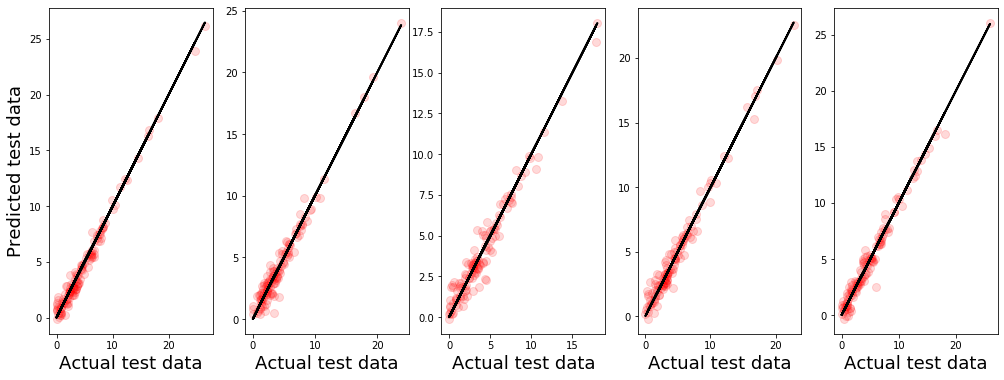

In [15]:
fig, axes = plt.subplots(1, 5, figsize=(17, 6))
r2_test=[]

axes[0].set_ylabel('Predicted test data')

for i in range(5):
    X_train = X_train_5fold[:, :, i]
    X_test = X_test_5fold[:, :, i]
    y_train = y_train_5fold[:, :, i]
    y_test = y_test_5fold[:, :, i]
    
    KRR_unscaled = KernelRidge(alpha=KRR_alpha_best, kernel='rbf', gamma=KRR_gamma_best)
    KRR_unscaled.fit(X_train, y_train)
    r2_test.append(KRR_unscaled.score(X_test,y_test))
    print('r2 test={:.3f}'.format(KRR_unscaled.score(X_test,y_test)))
    yhat_unscaled_test = KRR_unscaled.predict(X_test)
    axes[i].scatter(y_test, yhat_unscaled_test, alpha=0.15, c='r')
    axes[i].plot(y_test, y_test, '-k')
    axes[i].set_xlabel('Actual test data')
    

Judging from the r2 for different test sets from 5-fold validation (all>0.9) and the parity plots (nearly no points off-diagonal), the hyperparameters work well for the model.

### Regression using scaled data with hyperparameter tuning

In [16]:
#Regression with scaled data
#GridSearchCV alpha iterate gamma

sigmas = np.array([1E-4, 5E-4, 1E-3, 5E-3, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 15, 20, 25, 30, 40, 50, 60])
gammas = 1./(2*sigmas**2)
alphas = np.array([1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100])
parameter_ranges = {'alpha':alphas}

KRR_r2_test_scaled_list = []
KRR_coef_scaled_list = []
KRR_gamma_scaled_list = []
KRR_alpha_scaled_list = []

for gamma in gammas:
    KRR = KernelRidge(kernel='rbf',gamma=gamma)
    KRR_search = GridSearchCV(KRR, parameter_ranges, cv=kf)
    KRR_search.fit(X_train_test_scaled, y_train_test)
    KRR_r2_test_scaled_list.append(KRR_search.best_score_)
    KRR_gamma_scaled_list.append(KRR_search.best_estimator_.gamma)
    KRR_alpha_scaled_list.append(KRR_search.best_estimator_.alpha)
    KRR_coef_scaled_list.append(KRR_search.best_estimator_.dual_coef_)    

    
best_i = np.array(KRR_r2_test_scaled_list).argmax()
KRR_r2_best_scaled1= KRR_r2_test_scaled_list[best_i]
KRR_gamma_best_scaled_1 = KRR_gamma_scaled_list[best_i]
KRR_alpha_best_scaled_1 = KRR_alpha_scaled_list[best_i]
KRR_coef_best_scaled_1 = KRR_coef_scaled_list[best_i]

print("Highest r2={:.3f},\toptimal gamma={:.0e},\toptimal alpha={:.0e}".format(KRR_r2_test_scaled_list[best_i], KRR_gamma_best_scaled_1, KRR_alpha_best_scaled_1))


Highest r2=0.989,	optimal gamma=2e-03,	optimal alpha=1e-03


By using scaled data for regression, the r square score is able to improve compared with the model using unscaled data.

In [17]:
#second interation with smaller range of alphas and gammas

gammas = np.array([KRR_gamma_best_scaled_1*0.5,KRR_gamma_best_scaled_1*0.75,KRR_gamma_best_scaled_1,KRR_gamma_best_scaled_1*2.5,KRR_gamma_best_scaled_1*5])
alphas = np.array([KRR_alpha_best_scaled_1*0.5,KRR_alpha_best_scaled_1*0.75,KRR_alpha_best_scaled_1,KRR_alpha_best_scaled_1*2.5,KRR_alpha_best_scaled_1*5])
parameter_ranges = {'alpha':alphas}

KRR_r2_test_scaled_list = []
KRR_coef_scaled_list = []
KRR_gamma_scaled_list = []
KRR_alpha_scaled_list = []

for gamma in gammas:
    KRR = KernelRidge(kernel='rbf',gamma=gamma)
    KRR_search = GridSearchCV(KRR, parameter_ranges, cv=kf)
    KRR_search.fit(X_train_test_scaled, y_train_test)
    KRR_r2_test_scaled_list.append(KRR_search.best_score_)
    KRR_gamma_scaled_list.append(KRR_search.best_estimator_.gamma)
    KRR_alpha_scaled_list.append(KRR_search.best_estimator_.alpha)
    KRR_coef_scaled_list.append(KRR_search.best_estimator_.dual_coef_)    

    
best_i = np.array(KRR_r2_test_scaled_list).argmax()
KRR_r2_best_scaled2= KRR_r2_test_scaled_list[best_i]
KRR_gamma_best_scaled = KRR_gamma_scaled_list[best_i]
KRR_alpha_best_scaled = KRR_alpha_scaled_list[best_i]
KRR_coef_best_scaled = KRR_coef_scaled_list[best_i]

print("Highest r2={:.3f},\toptimal gamma={:.0e},\toptimal alpha={:.0e}".format(KRR_r2_test_scaled_list[best_i], KRR_gamma_best_scaled, KRR_alpha_best_scaled))

Highest r2=0.989,	optimal gamma=6e-03,	optimal alpha=5e-03


After the hyperparameters are refined, the optimal values change a little bit，but the r2 remains nearly the same.

r2_test=0.990
r2_test=0.987
r2_test=0.987
r2_test=0.987
r2_test=0.992


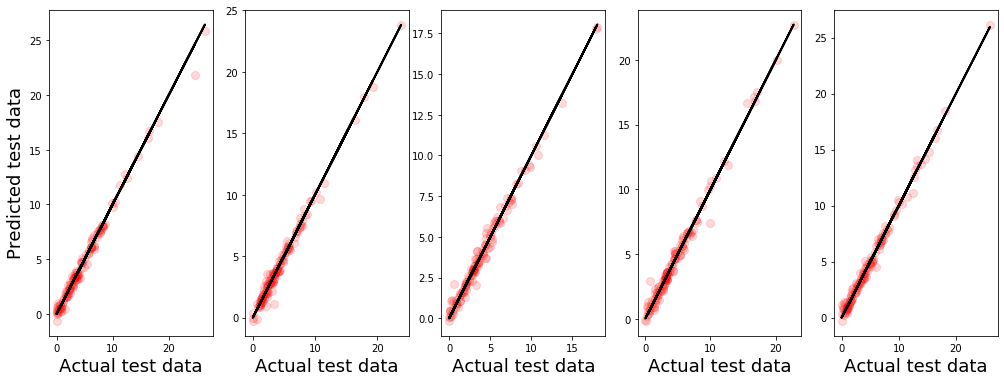

In [18]:
fig, axes = plt.subplots(1, 5, figsize=(17, 6))
r2_test=[]

axes[0].set_ylabel('Predicted test data')

for i in range(5):
    X_train = X_train_scaled_5fold[:, :, i]
    X_test = X_test_scaled_5fold[:, :, i]
    y_train = y_train_5fold[:, :, i]
    y_test = y_test_5fold[:, :, i]
    
    KRR_scaled = KernelRidge(alpha=KRR_alpha_best_scaled, kernel='rbf', gamma=KRR_gamma_best_scaled)
    KRR_scaled.fit(X_train, y_train)
    r2_test.append(KRR_scaled.score(X_test,y_test))
    print('r2_test={:.3f}'.format(KRR_scaled.score(X_test,y_test)))
    yhat_scaled_test = KRR_scaled.predict(X_test)
    axes[i].scatter(y_test, yhat_scaled_test, alpha=0.15, c='r')
    axes[i].plot(y_test, y_test, '-k')
    axes[i].set_xlabel('Actual test data')
    

Looking at the parity plots we know that the model using scaled data works well.

The model using unscaled data has 600 coefficients.
The largest coefficient is 2931.718.


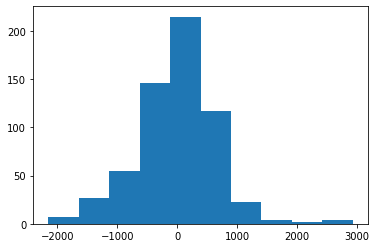

In [19]:
print('The model using unscaled data has {} coefficients.'.format(len(KRR_coef_best)))

fig, ax = plt.subplots()
ax.hist(KRR_coef_best)
print('The largest coefficient is {:.3f}.'.format(max(abs(KRR_coef_best))[0]));
KRR_largest_coef=max(abs(KRR_coef_best))[0]

The model using scaled data has 600 coefficients.
The largest coefficient is 190.398.


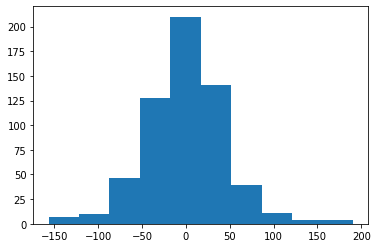

In [20]:
print('The model using scaled data has {} coefficients.'.format(len(KRR_coef_best_scaled)))

fig, ax = plt.subplots()
ax.hist(KRR_coef_best_scaled)
print('The largest coefficient is {:.3f}.'.format(max(abs(KRR_coef_best_scaled))[0]));
KRR_largest_coef_scaled=max(abs(KRR_coef_best_scaled))[0]

# LASSO regression
Lasso regression is a type of linear regression that uses shrinkage. LASSO is the abreviation of Least Absolute Shrinkage and Selection Operator. 
This particular type of regression is well-suited for models showing high levels of muticollinearity or to automate certain parts of model selection, such as parameter elimination. 
As we have been taught during the lecture, the loss function for LASSO is defined as:

$$L_\text{LASSO} = \sum_i {\varepsilon_i}^2 + \alpha ||\vec{w}||_1$$

Despite the fact that our multi-linear model works very well, overfitting is still a big issue that we have 36 descriptor but only 802 data points ($< 35^2$). Parameter regularization is therefore an effectively way to avoid such complexity.

Herein, we introduce Lasso Regression based on the follow reasons:
1. Overfitting issue from our baseline model should be resolved.
2. Dropping some unimportant features and simplify our model. 

Because our multi-linear model has very good performance, the first part is Lasso regularization combined with multi-linear model which has 35 features. The second part of Lasso regularization has different input, which is rbf kernel matrix (600 datapoints as descriptors), to see if Lasso regression improves the poor performance of rbf kernel in our baseline model (even though very unlikely).

## LASSO multi-linear regression
### Regression using unscaled Data

In [37]:
alphas = np.array([1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100])

# lasso_alpha_list = []
# lasso_r2_list = []
# lasso_coef_list = []
# lasso_num_dropped = []

parameter_set = {'alpha':alphas}

LASSO = Lasso(tol=1)
LASSO_search = GridSearchCV(LASSO, parameter_set, cv =kf)
LASSO_search.fit(X_train_test, y_train_test)


best_alpha = LASSO_search.best_estimator_.alpha
r_2 = LASSO_search.best_score_
coeffs = LASSO_search.best_estimator_.coef_
nonzero = [f for f in np.isclose(coeffs,0) if f == True]
num_dropped = len(nonzero)

r2s_alpha = LASSO_search.cv_results_['mean_test_score']


print('Best alpha is: {}'.format(best_alpha))
print('r square is: {}'.format(r_2))
print('Number of dropped features: {}'.format(num_dropped))

#Second refinement
print('\n====== Second GridSearchCV Refinement ======\n')

alphas_fine = np.array([0.1, 0.5, 0.7, 0.8, 0.9, 1, 2, 3, 5, 10])

parameter_set = {'alpha':alphas_fine}

LASSO = Lasso(tol=1)
LASSO_search = GridSearchCV(LASSO, parameter_set, cv =kf)
LASSO_search.fit(X_train_test, y_train_test)

best_alpha = LASSO_search.best_estimator_.alpha
r_2 = LASSO_search.best_score_
coeffs = LASSO_search.best_estimator_.coef_
nonzero = [f for f in np.isclose(coeffs,0) if f == True]
num_dropped = len(nonzero)
    
r2s_alpha_fine = LASSO_search.cv_results_['mean_test_score']
    
print('Best alpha is: {}'.format(best_alpha))
print('r square is: {}'.format(r_2))
print('Number of dropped features: {}'.format(num_dropped))

Best alpha is: 1.0
r square is: 0.9534954555344537
Number of dropped features: 28

====== Second GridSearchCV Refinement ======

Best alpha is: 0.5
r square is: 0.9690077684457663
Number of dropped features: 29


Text(0, 0.5, 'score')

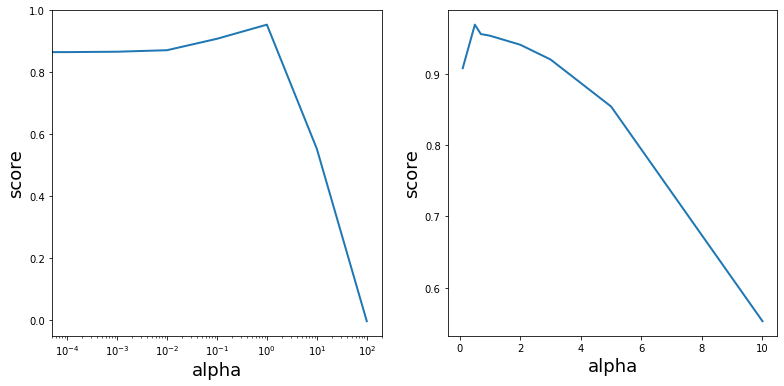

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(13, 6))

axes[0].plot(alphas, r2s_alpha, alpha=1)
axes[0].set_xlabel('alpha')
axes[0].set_ylabel('score')
axes[0].set_xscale('log')
axes[0].set_xlim(5e-5, 2e2)

axes[1].plot(alphas_fine, r2s_alpha_fine, alpha=1)
axes[1].set_xlabel('alpha')
axes[1].set_ylabel('score')

Considering the trade-off between precision and model simplification. The goal of this work is to predict the gas uptate by feature of MOFs and adsorbates with very high accuracy. But from experimental aspect, it is definitely much more convenient if a relatively small amount of descriptors could sufficiently predict gas uptakes since features could be difficult and time-consuming to be obtained experimentally. Consequently, the above $r_{square}$ vs. $\alpha$ figures is plotted to demonstrate alpha optimization.

$r_{square}$ vs. $\alpha$ plots (left: broad scan; right: finer scan) show that if $\alpha$ is too large, important features are ignored and thus causes extremely low or even negative $r_{square}$. This is reasonable because extreme regularization means that no regression is applied (first term of the loss function neglected). In our case, we want $\alpha$ as large as possible without sacrifices $r_{square}$. From our result, optimal $\alpha$ is 0.5.

### Scaled X

In [23]:
alphas = np.array([1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100])

parameter_set = {'alpha':alphas}

LASSO = Lasso(tol=1)
LASSO_search = GridSearchCV(LASSO, parameter_set, cv =kf)
LASSO_search.fit(X_train_test_scaled, y_train_test)
                     
best_alpha = LASSO_search.best_estimator_.alpha
r_2 = LASSO_search.best_score_
coeffs = LASSO_search.best_estimator_.coef_
nonzero = [f for f in np.isclose(coeffs,0) if f == True]
num_dropped = len(nonzero)

r2s_alpha = LASSO_search.cv_results_['mean_test_score']

    
print('Best alpha is: {}'.format(best_alpha))
print('r square is: {}'.format(r_2))
print('Number of dropped features: {}'.format(num_dropped))

#Second refinement
print('\n====== Second GridSearchCV Refinement ======\n')

alphas_fine = np.array([0.1, 0.5, 0.7, 0.8, 0.9, 1, 2, 3, 5, 10])

parameter_set = {'alpha':alphas_fine}

LASSO = Lasso(tol=1)
LASSO_search = GridSearchCV(LASSO, parameter_set, cv =kf)
LASSO_search.fit(X_train_test_scaled, y_train_test)
                     
best_alpha = LASSO_search.best_estimator_.alpha
r_2 = LASSO_search.best_score_
coeffs = LASSO_search.best_estimator_.coef_
nonzero = [f for f in np.isclose(coeffs,0) if f == True]
num_dropped = len(nonzero)

r2s_alpha_fine = LASSO_search.cv_results_['mean_test_score']
    
print('Best alpha is: {}'.format(best_alpha))
print('r square is: {}'.format(r_2))
print('Number of dropped features: {}'.format(num_dropped))
print(coeffs)

Best alpha is: 1.0
r square is: 0.8885318574513521
Number of dropped features: 33

====== Second GridSearchCV Refinement ======

Best alpha is: 0.5
r square is: 0.903420126173151
Number of dropped features: 32
[ 1.58275627 -0.          0.         -0.          0.         -0.
 -0.         -0.          0.         -0.          0.          0.
  0.          0.          0.         -0.          0.         -0.
 -0.         -0.         -0.         -0.          0.         -0.
  0.          0.         -0.          0.         -0.         -0.
  0.18572966  0.          0.          0.          2.19892201]


Text(0, 0.5, 'score')

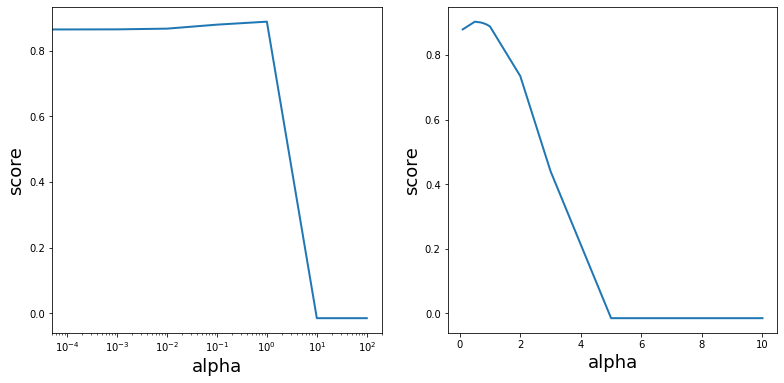

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(13, 6))

axes[0].plot(alphas, r2s_alpha, alpha=1)
axes[0].set_xlabel('alpha')
axes[0].set_ylabel('score')
axes[0].set_xscale('log')
axes[0].set_xlim(5e-5, 2e2)

axes[1].plot(alphas_fine, r2s_alpha_fine, alpha=1)
axes[1].set_xlabel('alpha')
axes[1].set_ylabel('score')

After rescaling x matirx accross data points, surprisingly, the performance of the model became slightly worse. But generally, multi-linear Lasso regression is a good appoach to shrink and largly simplify descriptors the with high accuracy (32 features are dropped based on the result, only two features are really important). This is a very exciting result that we can only use 3 most important features to describe gas uptakes for most of the cases!

The 3 most important features are: $V_{f}$, accessible pore volume per unit cell of MOF, $P_{c}$, critical pressure (bar) of absorbate (related to the equation of state of real gas), and gas uptake of rigid structure.

## LASSO Regression with RBF Kernel

### Regression Using Unscaled Data

In [25]:
sigmas = np.array([1E-4, 5E-4, 1E-3, 5E-3, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 15, 20, 25, 30, 40, 50, 60])
gammas = 1./(2*sigmas**2)
r2_matrix = np.zeros((gammas.size, 4))

alphas = np.array([1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100])
parameter_set = {'alpha':alphas}

     
for j, gamma in enumerate(gammas):
    
    X_train_kernel = rbf_kernel(X_train_test, X_train_test, gamma = gamma)
        
    LASSO = Lasso(tol=1)
    LASSO_search = GridSearchCV(LASSO, parameter_set, cv =kf)
    LASSO_search.fit(X_train_kernel, y_train_test)

    r2_matrix[j, 0] = gamma
    r2_matrix[j, 1] = LASSO_search.best_estimator_.alpha
    r2_matrix[j, 2] = LASSO_search.best_score_
    coeffs = LASSO_search.best_estimator_.coef_
    nonzero = [f for f in np.isclose(coeffs,0) if f == True]
    num_dropped = len(nonzero)
    r2_matrix[j, -1] = int(num_dropped)
        
n = r2_matrix[:, 2].argmax()
# print(r2_matrix)

print('Best gamma is: {:.0e}'.format(r2_matrix[n,0]))
print('Best alpha is: {:.0e}'.format(r2_matrix[n,1]))
print('r square is: {:.3f}'.format(r2_matrix[n,2]))
print('Number of dropped features: {}'.format(r2_matrix[n,-1]))


#Second refinement
print('\n====== Second GridSearchCV Refinement ======\n')

sigmas = np.array([5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])
gammas = 1./(2*sigmas**2)
r2_matrix = np.zeros((gammas.size, 4))

alphas = np.array([1e-4, 5e-4, 8e-4, 9e-4, 1e-3, 2e-3, 3e-3, 5e-3, 7e-3])
parameter_set = {'alpha':alphas}

     
for j, gamma in enumerate(gammas):
    
    X_train_kernel = rbf_kernel(X_train_test, X_train_test, gamma = gamma)
        
    LASSO = Lasso(tol=1)
    LASSO_search = GridSearchCV(LASSO, parameter_set, cv =kf)
    LASSO_search.fit(X_train_kernel, y_train_test)

    r2_matrix[j, 0] = gamma
    r2_matrix[j, 1] = LASSO_search.best_estimator_.alpha
    r2_matrix[j, 2] = LASSO_search.best_score_
    coeffs = LASSO_search.best_estimator_.coef_
    nonzero = [f for f in np.isclose(coeffs,0) if f == True]
    num_dropped = len(nonzero)
    r2_matrix[j, -1] = int(num_dropped)
        
n = r2_matrix[:, 2].argmax()
# print(r2_matrix)

print('Best gamma is: {:.0e}'.format(r2_matrix[n,0]))
print('Best alpha is: {:.0e}'.format(r2_matrix[n,1]))
print('r square is: {:.3f}'.format(r2_matrix[n,2]))
print('Number of dropped features: {}'.format(r2_matrix[n,-1]))

Best gamma is: 5e-03
Best alpha is: 1e-04
r square is: 0.541
Number of dropped features: 8.0

====== Second GridSearchCV Refinement ======

Best gamma is: 4e-03
Best alpha is: 1e-04
r square is: 0.547
Number of dropped features: 12.0


Not surprisingly, unscaled X results in poor r square performances. We want to address here that using rbf kernel matrix seems to be unclever because it averages out each row into a single value (i.e. assuming all features have same contributions). Apparently, ignoring physical meanings of descriptors causes huge problem. 

### Regression Using Scaled Data

In [26]:
sigmas = np.array([1E-4, 5E-4, 1E-3, 5E-3, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 15, 20, 25, 30, 40, 50, 60])
gammas = 1./(2*sigmas**2)
r2_matrix = np.zeros((gammas.size, 4))

alphas = np.array([1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100])
parameter_set = {'alpha':alphas}

     
for j, gamma in enumerate(gammas):
    
    X_train_kernel = rbf_kernel(X_train_test_scaled, X_train_test_scaled, gamma = gamma)
        
    LASSO = Lasso(tol=1)
    LASSO_search = GridSearchCV(LASSO, parameter_set, cv =kf)
    LASSO_search.fit(X_train_kernel, y_train_test)

    r2_matrix[j, 0] = gamma
    r2_matrix[j, 1] = LASSO_search.best_estimator_.alpha
    r2_matrix[j, 2] = LASSO_search.best_score_
    coeffs = LASSO_search.best_estimator_.coef_
    nonzero = [f for f in np.isclose(coeffs,0) if f == True]
    num_dropped = len(nonzero)
    r2_matrix[j, -1] = num_dropped
        
n = r2_matrix[:, 2].argmax()
# print(r2_matrix)

print('Best gamma is: {:.0e}'.format(r2_matrix[n,0]))
print('Best alpha is: {:.0e}'.format(r2_matrix[n,1]))
print('r square is: {:.3f}'.format(r2_matrix[n,2]))
print('Number of dropped features: {}'.format(r2_matrix[n,-1]))


#Second refinement
print('\n====== Second GridSearchCV Refinement ======\n')

sigmas = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
gammas = 1./(2*sigmas**2)
r2_matrix = np.zeros((gammas.size, 4))

alphas = np.array([1e-5, 2e-5, 3e-5, 4e-5, 5e-5])
parameter_set = {'alpha':alphas}

     
for j, gamma in enumerate(gammas):
    
    X_train_kernel = rbf_kernel(X_train_test_scaled, X_train_test_scaled, gamma = gamma)
        
    LASSO = Lasso(tol=1)
    LASSO_search = GridSearchCV(LASSO, parameter_set, cv =kf)
    LASSO_search.fit(X_train_kernel, y_train_test)

    r2_matrix[j, 0] = gamma
    r2_matrix[j, 1] = LASSO_search.best_estimator_.alpha
    r2_matrix[j, 2] = LASSO_search.best_score_
    coeffs = LASSO_search.best_estimator_.coef_
    nonzero = [f for f in np.isclose(coeffs,0) if f == True]
    num_dropped = len(nonzero)
    r2_matrix[j, -1] = num_dropped
        
n = r2_matrix[:, 2].argmax()
# print(r2_matrix)
# print(coeffs.shape)

print('Best gamma is: {:.0e}'.format(r2_matrix[n,0]))
print('Best alpha is: {:.0e}'.format(r2_matrix[n,1]))
print('r square is: {:.3f}'.format(r2_matrix[n,2]))
print('Number of dropped features: {}'.format(r2_matrix[n,-1]))

Best gamma is: 2e-02
Best alpha is: 1e-05
r square is: 0.945
Number of dropped features: 0.0

====== Second GridSearchCV Refinement ======

Best gamma is: 1e-02
Best alpha is: 1e-05
r square is: 0.945
Number of dropped features: 1.0


After rescaling x matirx accross data points, there is a huge improvement of model performance. However, just 1 of the 600 features is dropped (non-parametric model), and optimal alpha values are all very small, i.e. the model is not regularized at all, parameters not simplified. 

# MLPRegressor (neural network)

Neural network (NN) is a powerful set of algorithms inspired by human brains.
As mentioned in the class, perceptron classifier model can be seen as a single layer NN classifier model, and NN models can be seen as multi-layer perceptron models by applying the logistic or ReLU functions several times on the perceptron model outputs.
They are good at nonlinear data processing and are used extensively in many fields, such as image processing, natural languange processing and forecasting.

<img src="images/NN.png" width="600">

Here we intend to apply one of NN regression models on our project to:

1. learn the mechanism of NN models, which hyperparameters they have, and how to tune them, and
2. briefly compare NN prediction results with other prediction models covered in the class.

The NN model that we use is `MLPRegressor` in `sklearn`, where `MLP` means multi-layer Perceptron.
It is capable of processing nonlinear data, but it has a nonconvex loss function, which makes it hard to find the global optimum.
It also involves a number of hyperparameters, such as the number of hidden neurons and layers.
The focus of this section is to finely tuning the hyperparameters of `MLPRegressor` to try to obtain a NN model with improved prediction ability.

## Hyperparameter tuning strategy

There are three main types of hyperparameters:

2. the number of hidden layers ($L \in \mathbb{N}$),
1. the number of hidden neurons ($n_l \in \mathbb{N}, l \in \{1,2,...,L\}$), and
3. loss function types (Logistic function or Rectified Linear Unit (ReLU) function).

$$\mathcal{L}_\text{logistic} (x) = \max(0, x) $$

$$\mathcal{L}_\text{ReLU} (x) = \ln (1 + e^{-x}) $$

The number of parameters in the model grows linearly with $n_l$ and exponentially with $L$.
Therefore, it may be computationally expensive to simultaneously tune $n_l$ and $L$.
An alternative way is to first tune $n_1$ for a single-layer NN model, then fix $n_1$ and tune $n_2$ and so on.
So we propose to tune the hyperparameter for the NN model using the alternative way
while limiting the upper bound of $n_i$ to 100 and $L$ to 3.
The tuning process will be conducted twice with Logistic and ReLu as loss functions respectively.

## Hyperparameter tuning for MLPRegressor with Logistic loss function
### Tuning for 1-layer model
First a rough value list of $n_1$ is searched through:

In [27]:
layer_list_n1 = [1] + list(range(10, 110, 10))
print("Initial n1 search space: {}".format(layer_list_n1))
layer_dict_n1 = {
    'hidden_layer_sizes': layer_list_n1
}

Initial n1 search space: [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]


In [28]:
loss_fun = 'logistic'

model_NN_1 = MLPRegressor(max_iter=500, activation=loss_fun)
model_NN_1_search = GridSearchCV(model_NN_1, layer_dict_n1, n_jobs=-1, cv=kf)
model_NN_1_search.fit(X_train_test, y_train_test.ravel())
model_NN_1_best = model_NN_1_search.best_estimator_
print("Best model score: {:.3f}".format(model_NN_1_search.best_score_))
print("Best n1: {:d}".format(model_NN_1_best.hidden_layer_sizes))

Best model score: 0.960
Best n1: 100


C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Then a more refined search space of $n_1$ is used:

In [29]:
layer_list_n1_refined = list(range(model_NN_1_best.hidden_layer_sizes - 10, min(102, model_NN_1_best.hidden_layer_sizes + 10), 2))
print("Refined n1 search space: {}".format(layer_list_n1_refined))
layer_dict_n1_refined = {
    'hidden_layer_sizes': layer_list_n1_refined
}

model_NN_1_refined = MLPRegressor(max_iter=500, activation=loss_fun)
model_NN_1_refined_search = GridSearchCV(model_NN_1_refined, layer_dict_n1_refined, n_jobs=-1, cv=kf)
model_NN_1_refined_search.fit(X_train_test, y_train_test.ravel())
logistic_NN_1_refined_best = model_NN_1_refined_search.best_estimator_
logistic_NN_1_refined_score = model_NN_1_refined_search.best_score_
best_n1 = logistic_NN_1_refined_best.hidden_layer_sizes
print("Best model score: {:.3f}".format(logistic_NN_1_refined_score))
print("Best n1: {:d}".format(best_n1))

Refined n1 search space: [90, 92, 94, 96, 98, 100]
Best model score: 0.962
Best n1: 100


### Tuning for 2-layer model
Denote $n_1^*$ as the optimal value for the number of neurons for the first layer.
A list of 2-tuples is defined as the search space for the 2-layer NN model.
The first element is fixed at $n_1^*$, the second element varies from 1 to 100.

In [30]:
list_temp = [1] + list(range(10, 110, 10))

layer_list_n2 = []
for i in list_temp:
    layer_list_n2.append((best_n1, i))

print("Initial (n1, n2) search space: {}".format(layer_list_n2))
layer_dict_n2 = {
    'hidden_layer_sizes': layer_list_n2
}

model_NN_2 = MLPRegressor(max_iter=500, activation=loss_fun)
model_NN_2_search = GridSearchCV(model_NN_2, layer_dict_n2, n_jobs=-1, cv=kf)
model_NN_2_search.fit(X_train_test, y_train_test.ravel())
model_NN_2_best = model_NN_2_search.best_estimator_
print("Best model score: {:.3f}".format(model_NN_2_search.best_score_))
print("Best (n1, n2): {}".format(model_NN_2_best.hidden_layer_sizes))

Initial (n1, n2) search space: [(100, 1), (100, 10), (100, 20), (100, 30), (100, 40), (100, 50), (100, 60), (100, 70), (100, 80), (100, 90), (100, 100)]
Best model score: 0.962
Best (n1, n2): (100, 90)


It is worth noting that ($n_1^*$, $n_2$) leads to a slightly worse results than the single ($n_1^*$).
The reason may mainly be the non-convexity of the loss function, which causes the solver to converge to a local optimum and there is no guarantee that a model with more layers following this stratgy yields a better solution.

Similarly, a refined space is used for $n_2$:

In [31]:
list_temp = list(range(model_NN_2_best.hidden_layer_sizes[1] - 10, min(100, model_NN_2_best.hidden_layer_sizes[1] + 10), 2))

layer_list_n2_refined = []
for i in list_temp:
    layer_list_n2_refined.append((best_n1, i))

print("Refined (n1, n2) search space: {}".format(layer_list_n2_refined))
layer_dict_n2_refined = {
    'hidden_layer_sizes': layer_list_n2_refined
}

model_NN_2_refined = MLPRegressor(max_iter=500, activation=loss_fun)
model_NN_2_refined_search = GridSearchCV(model_NN_2_refined, layer_dict_n2_refined, n_jobs=-1, cv=kf)
model_NN_2_refined_search.fit(X_train_test, y_train_test.ravel())
logistic_NN_2_refined_best = model_NN_2_refined_search.best_estimator_
logistic_NN_2_refined_score = model_NN_2_refined_search.best_score_
best_n2 = logistic_NN_2_refined_best.hidden_layer_sizes
print("Best model score: {:.3f}".format(logistic_NN_2_refined_score))
print("Best (n1, n2): {}".format(best_n2))

Refined (n1, n2) search space: [(100, 80), (100, 82), (100, 84), (100, 86), (100, 88), (100, 90), (100, 92), (100, 94), (100, 96), (100, 98)]
Best model score: 0.963
Best (n1, n2): (100, 94)


### Tuning for 3-layer model
$n_3$ is tuned in a similar manner:

In [32]:
# initial search
list_temp = [1] + list(range(10, 110, 10))

layer_list_n3 = []
for i in list_temp:
    layer_list_n3.append((best_n1, best_n2[1], i))

print("Initial (n1, n2, n3) search space: {}".format(layer_list_n3))
layer_dict_n3 = {
    'hidden_layer_sizes': layer_list_n3
}

model_NN_3 = MLPRegressor(max_iter=500, activation=loss_fun)
model_NN_3_search = GridSearchCV(model_NN_3, layer_dict_n3, n_jobs=-1, cv=kf)
model_NN_3_search.fit(X_train_test, y_train_test.ravel())
model_NN_3_best = model_NN_3_search.best_estimator_
print("Best model score: {:.3f}".format(model_NN_3_search.best_score_))
print("Best (n1, n2, n3): {}".format(model_NN_3_best.hidden_layer_sizes))

# refined search
list_temp = list(range(model_NN_3_best.hidden_layer_sizes[2] - 10, min(100, model_NN_3_best.hidden_layer_sizes[2] + 10), 2))
layer_list_n3_refined = []
for i in list_temp:
    layer_list_n3_refined.append((best_n1, best_n2[1], i))

print("Refined (n1, n2, n3) search space: {}".format(layer_list_n3_refined))
layer_dict_n3_refined = {
    'hidden_layer_sizes': layer_list_n3_refined
}

model_NN_3_refined = MLPRegressor(max_iter=500, activation=loss_fun)
model_NN_3_refined_search = GridSearchCV(model_NN_3_refined, layer_dict_n3_refined, n_jobs=-1, cv=kf)
model_NN_3_refined_search.fit(X_train_test, y_train_test.ravel())
logistic_NN_3_refined_best = model_NN_3_refined_search.best_estimator_
logistic_NN_3_refined_score = model_NN_3_refined_search.best_score_
print("Best model score: {:.3f}".format(logistic_NN_3_refined_score))
print("Best (n1, n2, n3): {}".format(logistic_NN_3_refined_best.hidden_layer_sizes))

Initial (n1, n2, n3) search space: [(100, 94, 1), (100, 94, 10), (100, 94, 20), (100, 94, 30), (100, 94, 40), (100, 94, 50), (100, 94, 60), (100, 94, 70), (100, 94, 80), (100, 94, 90), (100, 94, 100)]
Best model score: 0.962
Best (n1, n2, n3): (100, 94, 100)
Refined (n1, n2, n3) search space: [(100, 94, 90), (100, 94, 92), (100, 94, 94), (100, 94, 96), (100, 94, 98)]
Best model score: 0.960
Best (n1, n2, n3): (100, 94, 98)


## Hyperparameter tuning for MLPRegressor with ReLU loss function

The tuning process for the NN model using ReLU loss function is similar to the process above, except the loss function is specified as ReLU.

In [33]:
# 1st layer
layer_list_n1 = [1] + list(range(10, 110, 10))
print("Initial n1 search space: {}".format(layer_list_n1))
layer_dict_n1 = {
    'hidden_layer_sizes': layer_list_n1
}

loss_fun = 'relu'

model_NN_1 = MLPRegressor(max_iter=500, activation=loss_fun)
model_NN_1_search = GridSearchCV(model_NN_1, layer_dict_n1, n_jobs=-1, cv=kf)
model_NN_1_search.fit(X_train_test, y_train_test.ravel())
model_NN_1_best = model_NN_1_search.best_estimator_
print("Best model score: {:.3f}".format(model_NN_1_search.best_score_))
print("Best n1: {:d}".format(model_NN_1_best.hidden_layer_sizes))



layer_list_n1_refined = list(range(model_NN_1_best.hidden_layer_sizes - 10, min(100, model_NN_1_best.hidden_layer_sizes + 10), 2))
print("Refined n1 search space: {}".format(layer_list_n1_refined))
layer_dict_n1_refined = {
    'hidden_layer_sizes': layer_list_n1_refined
}

model_NN_1_refined = MLPRegressor(max_iter=750, activation=loss_fun)
model_NN_1_refined_search = GridSearchCV(model_NN_1_refined, layer_dict_n1_refined, n_jobs=-1, cv=kf)
model_NN_1_refined_search.fit(X_train_test, y_train_test.ravel())
relu_NN_1_refined_best = model_NN_1_refined_search.best_estimator_
relu_NN_1_refined_score = model_NN_1_refined_search.best_score_
best_n1 = relu_NN_1_refined_best.hidden_layer_sizes
print("Best model score: {:.3f}".format(relu_NN_1_refined_score))
print("Best n1: {:d}".format(best_n1))

Initial n1 search space: [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
Best model score: 0.967
Best n1: 90
Refined n1 search space: [80, 82, 84, 86, 88, 90, 92, 94, 96, 98]
Best model score: 0.963
Best n1: 94


In [34]:
# 2nd layer
list_temp = [1] + list(range(10, 110, 10))

layer_list_n2 = []
for i in list_temp:
    layer_list_n2.append((best_n1, i))

print("Initial (n1, n2) search space: {}".format(layer_list_n2))
layer_dict_n2 = {
    'hidden_layer_sizes': layer_list_n2
}

model_NN_2 = MLPRegressor(max_iter=750, activation=loss_fun)
model_NN_2_search = GridSearchCV(model_NN_2, layer_dict_n2, n_jobs=-1, cv=kf)
model_NN_2_search.fit(X_train_test, y_train_test.ravel())
model_NN_2_best = model_NN_2_search.best_estimator_
print("Best model score: {:.3f}".format(model_NN_2_search.best_score_))
print("Best (n1, n2): {}".format(model_NN_2_best.hidden_layer_sizes))



list_temp = list(range(max(1, model_NN_2_best.hidden_layer_sizes[1] - 10), min(100, model_NN_2_best.hidden_layer_sizes[1] + 10), 2))

layer_list_n2_refined = []
for i in list_temp:
    layer_list_n2_refined.append((best_n1, i))

print("Refined (n1, n2) search space: {}".format(layer_list_n2_refined))
layer_dict_n2_refined = {
    'hidden_layer_sizes': layer_list_n2_refined
}

model_NN_2_refined = MLPRegressor(max_iter=500, activation=loss_fun)
model_NN_2_refined_search = GridSearchCV(model_NN_2_refined, layer_dict_n2_refined, n_jobs=-1, cv=kf)
model_NN_2_refined_search.fit(X_train_test, y_train_test.ravel())
relu_NN_2_refined_best = model_NN_2_refined_search.best_estimator_
relu_NN_2_refined_score = model_NN_2_refined_search.best_score_
best_n2 = relu_NN_2_refined_best.hidden_layer_sizes
print("Best model score: {:.3f}".format(relu_NN_2_refined_score))
print("Best (n1, n2): {}".format(best_n2))

Initial (n1, n2) search space: [(94, 1), (94, 10), (94, 20), (94, 30), (94, 40), (94, 50), (94, 60), (94, 70), (94, 80), (94, 90), (94, 100)]
Best model score: 0.964
Best (n1, n2): (94, 30)
Refined (n1, n2) search space: [(94, 20), (94, 22), (94, 24), (94, 26), (94, 28), (94, 30), (94, 32), (94, 34), (94, 36), (94, 38)]
Best model score: 0.966
Best (n1, n2): (94, 20)


In [35]:
# 3rd layer
list_temp = [1] + list(range(10, 110, 10))

layer_list_n3 = []
for i in list_temp:
    layer_list_n3.append((best_n1, best_n2[1], i))

print("Initial (n1, n2, n3) search space: {}".format(layer_list_n3))
layer_dict_n3 = {
    'hidden_layer_sizes': layer_list_n3
}

model_NN_3 = MLPRegressor(max_iter=500, activation=loss_fun)
model_NN_3_search = GridSearchCV(model_NN_3, layer_dict_n3, n_jobs=-1, cv=kf)
model_NN_3_search.fit(X_train_test, y_train_test.ravel())
model_NN_3_best = model_NN_3_search.best_estimator_
print("Best model score: {:.3f}".format(model_NN_3_search.best_score_))
print("Best (n1, n2, n3): {}".format(model_NN_3_best.hidden_layer_sizes))

list_temp = list(range(max(model_NN_3_best.hidden_layer_sizes[2] - 10, 1), min(100, model_NN_3_best.hidden_layer_sizes[2] + 10), 2))
layer_list_n3_refined = []
for i in list_temp:
    layer_list_n3_refined.append((best_n1, best_n2[1], i))

print("Refined (n1, n2, n3) search space: {}".format(layer_list_n3_refined))
layer_dict_n3_refined = {
    'hidden_layer_sizes': layer_list_n3_refined
}

model_NN_3_refined = MLPRegressor(max_iter=500, activation=loss_fun)
model_NN_3_refined_search = GridSearchCV(model_NN_3_refined, layer_dict_n3_refined, n_jobs=-1, cv=kf)
model_NN_3_refined_search.fit(X_train_test, y_train_test.ravel())
relu_NN_3_refined_best = model_NN_3_refined_search.best_estimator_
relu_NN_3_refined_score = model_NN_3_refined_search.best_score_
print("Best model score: {:.3f}".format(relu_NN_3_refined_score))
print("Best (n1, n2, n3): {}".format(relu_NN_3_refined_best.hidden_layer_sizes))

Initial (n1, n2, n3) search space: [(94, 20, 1), (94, 20, 10), (94, 20, 20), (94, 20, 30), (94, 20, 40), (94, 20, 50), (94, 20, 60), (94, 20, 70), (94, 20, 80), (94, 20, 90), (94, 20, 100)]
Best model score: 0.964
Best (n1, n2, n3): (94, 20, 90)
Refined (n1, n2, n3) search space: [(94, 20, 80), (94, 20, 82), (94, 20, 84), (94, 20, 86), (94, 20, 88), (94, 20, 90), (94, 20, 92), (94, 20, 94), (94, 20, 96), (94, 20, 98)]
Best model score: 0.967
Best (n1, n2, n3): (94, 20, 98)


## Discussion

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


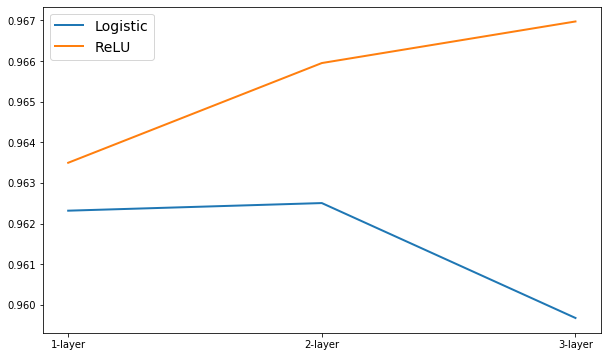

In [36]:
x = ['1-layer','2-layer','3-layer']
y_logistic = [logistic_NN_1_refined_score, logistic_NN_2_refined_score, logistic_NN_3_refined_score]
y_relu = [relu_NN_1_refined_score, relu_NN_2_refined_score, relu_NN_3_refined_score]

ax, fig = plt.subplots(figsize=(10, 6))
fig.plot(y_logistic, label="Logistic")
fig.plot(y_relu, label="ReLU")
plt.xticks(range(len(x)), x)
fig.legend()

The r2 score profiles along with the number of hidden layers are given above for both Logistic and ReLU loss functions.
Interestingly, all models obtain high $r_2$ values, and the increase of the number of hidden layers does not necessarily improve the model performance.
There may be several reasons:
1. The 1-layer model is already good enough, and adding extra layers cannot improve its performance, but may introduce some numeric errors causing slight decrease in the r2 score.
2. The proposed hyperparameter tuning strategy may not be valid. In other words, for a 2-layer model, the best number of neurons for the first layer may not correspond to the best number of neurons of a 1-layer model; there may exist a 2-layer model outperforming the one obtained from the proposed strategy.

Nevertheless, this section shows the ability of NN models for accurate prediction.

Also it is worth noting that training NN models is significantly computationally expensive than KRR and LASSO. 
We may consider training time as a criterion when comparing all models in the final report.

# Conclusions and future steps

In the improved model report, we update the validation strategy to improve its robustness, and implement three new regression models: KRR, LASSO and MLPRegressor (neural network).
- Section 5 clearly shows that the 5-fold validation strategy significantly helps improve model performance through training.

Implementation of the three models brings us different interesting findings:
- Section 6 shows that the addition of regularization may further improve the performance of the RBF kernel regression model.
- Section 7 shows the potentials of complexity optimization even for datasets of small size.
- Section 8 shows the difficulty of applying valid and efficient hyperparameter tuning for neural networks.

We may address all these findings and compare all models using the validation set in the final report. **Principle component analysis** could be included in our final report as another shrankage estimator. 


# Reference
Agrawal, Mayank, and David S. Sholl. "Effects of Intrinsic Flexibility on Adsorption Properties of Metal–Organic Frameworks at Dilute and Nondilute Loadings." *ACS applied materials & interfaces* 11.34 (2019): 31060-31068.